In [29]:
import cv2
import numpy as np
import glob
import os
import random
import pylab
import pickle

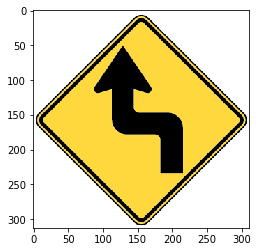

In [17]:
signs_files = glob.glob("sign/*out-01.png")
sign = cv2.imread(signs_files[random.randint(0, len(signs_files) - 1)])

sign_rgb = cv2.cvtColor(sign, cv2.COLOR_BGR2RGB)

pylab.imshow(sign_rgb)
pylab.show()

In [26]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(sign_rgb,None)
img=cv2.drawKeypoints(gray, kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

pylab.imshow(img)
pylab.show()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

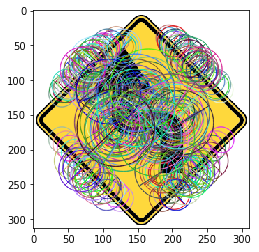

In [18]:
orb = cv2.ORB_create()
kp = orb.detect(sign,None)
kp, des = orb.compute(sign, kp)
img = np.zeros_like(sign, dtype=np.uint8)
img = cv2.drawKeypoints(sign_rgb, kp, outImage=img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

pylab.imshow(img)
pylab.show()

In [36]:
descriptor_list = []
orb = cv2.ORB_create()
for sign_file in signs_files:
    img = cv2.imread(sign_file)
    kp = orb.detect(img,None)
    kp, des = orb.compute(img, kp)
    kp_tuples = list(map(lambda p: (p.pt, p.size, p.angle, p.response, p.octave), kp))
    sign_description = {"file": sign_file, "keypoints": kp_tuples, "descriptor": des}
    descriptor_list.append(sign_description)
with open("sign_orb_descriptor.pikle", 'wb') as handle:
    pickle.dump(descriptor_list, handle, -1)